# Vehicle Range Prediction

In [1]:
# minzhou@bu.edu

In [301]:
import os
import json
from ast import literal_eval
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load data

In [3]:
data_folder = 'BU-SPARK-DATA'

def save_all_json_file_paths():
    json_files = {}
    for folder in os.listdir(data_folder):
        if 'app-results' in folder:
            app_folder = os.path.join(data_folder, folder)
            json_files[folder] = [os.path.join(app_folder, pos_json) 
                                  for pos_json in os.listdir(app_folder) if pos_json.endswith('.json')]
    return json_files 

In [4]:
json_files = save_all_json_file_paths()

In [5]:
json_files['app-results-1'][0]

'BU-SPARK-DATA/app-results-1/729.json'

## 2. Select the input variables

HEU and HPU specifications:
* system_cost
* system_weight
* num_HEU
* num_HPU
- HEU_nominal_energy
- HPU_nominal_energy
- HEU_cost (cost per cell)
- HPU_cost (cost per cell)
- HEU_weight (cell_mass)
- HPU_weight (cell_mass)
- HEU_max_power
- HPU_max_power
* dP_threshold

vehicle input variables:

- chassis_Mass_Min_Battery_Mass
- drag_Resistance
- frontal_area
- rolling_resistance
- power_Train_Eff


## Output
* system_range

In [182]:
feature_list = []
for result in json_files:
    for file_name in json_files[result]:
        try:
            with open(file_name) as data_file:
                json_file = json.load(data_file)
                python_dict = literal_eval(json_file)
                df = pd.DataFrame.from_dict(python_dict)
                python_dict_input = json.loads(df.input[0])
                
                # HPU and HEU specifications
                df_hpu_heu = pd.DataFrame(python_dict_input, columns=['HPU', 'HEU'])
                df_hpu_heu_series = df_hpu_heu.T[['cost_per_cell', 'nominal_energy', 'cell_mass']].stack()
                
                # vehicle input variables
                df_vehicle = pd.DataFrame(python_dict_input, columns=['vehicle'])
                df_vehicle_series = df_vehicle.T[['chassisMassMinBatteryMass', 'dragResistance', 
                                                  'frontalArea', 'rollingResistance', 'powerTrainEff']].stack()
                # system specifications
                df_spec_series = df.specifications[['system_cost', 'system_weight', 
                                                    'HEU_max_power', 'HPU_max_power', 'num_HEU', 
                                                    'num_HPU', 'dP_threshold', 'system_range']]
                # concate all features
                feature_series = pd.concat([df_spec_series, df_hpu_heu_series, df_vehicle_series])
                feature_list.append(feature_series)
        except:
            continue

In [183]:
feature_df = pd.concat(feature_list, axis=1, sort=False)

In [369]:
feature_df.T

,system_cost,system_weight,HEU_max_power,HPU_max_power,num_HEU,num_HPU,dP_threshold,system_range,"(HPU, cost_per_cell)","(HPU, nominal_energy)","(HPU, cell_mass)","(HEU, cost_per_cell)","(HEU, nominal_energy)","(HEU, cell_mass)","(vehicle, chassisMassMinBatteryMass)","(vehicle, dragResistance)","(vehicle, frontalArea)","(vehicle, rollingResistance)","(vehicle, powerTrainEff)"
0,"7,783.8750",259.7400,34.4589,0,3330,0,16.6781,300.4181,45.7000,0.0000,510.0000,1.8700,34.1358,60.0000,"1,166.0000",0.2900,2.2400,0.0150,84.0000
1,"10,788.5000",327.6780,69.9118,9.1387,3980,26,9.6274,160.2630,45.7000,0.0672,510.0000,1.8700,40.7990,60.0000,"2,624.0000",0.3000,5.0220,0.0150,84.0000
2,"7,783.8750",259.7400,34.4589,0,3330,0,16.6781,300.4181,45.7000,0.0000,510.0000,1.8700,34.1358,60.0000,"1,166.0000",0.2900,2.2400,0.0150,84.0000
3,"13,933.3750",383.3960,64.4257,9.8428,4690,52,8.3584,160.1012,45.7000,0.0539,260.0000,1.8700,48.0772,60.0000,"2,624.0000",0.3000,5.0220,0.0150,84.0000
4,"7,783.8750",259.7400,34.4589,0,3330,0,16.6781,300.4181,45.7000,0.0000,510.0000,1.8700,34.1358,60.0000,"1,166.0000",0.2900,2.2400,0.0150,84.0000
5,"16,325.5000",473.8240,53.4813,9.9609,5860,46,7.6394,400.4472,45.7000,0.0594,280.0000,1.8700,60.0709,60.0000,"1,756.0000",0.2400,2.3400,0.0150,84.0000
6,11130,376.1940,42.9906,0,7420,0,20.8534,170.1982,45.7000,0.0000,510.0000,1.2000,22.8944,39.0000,"1,542.0000",0.2800,2.1500,0.0150,84.0000
7,"7,783.8750",259.7400,34.4589,0,3330,0,16.6781,300.4181,45.7000,0.0000,510.0000,1.8700,34.1358,60.0000,"1,166.0000",0.2900,2.2400,0.0150,84.0000
8,9724,324.4800,36.5705,0,4160,0,23.4440,290.6880,45.7000,0.0000,510.0000,1.8700,42.6442,60.0000,"1,542.0000",0.2800,2.1500,0.0150,84.0000
9,"6,628.0000",211.2240,31.1488,2.8119,2640,8,4.7955,200.6680,45.7000,0.0207,510.0000,1.8700,27.0626,60.0000,"1,166.0000",0.2900,2.2400,0.0150,84.0000


### Correlation between the different features. 

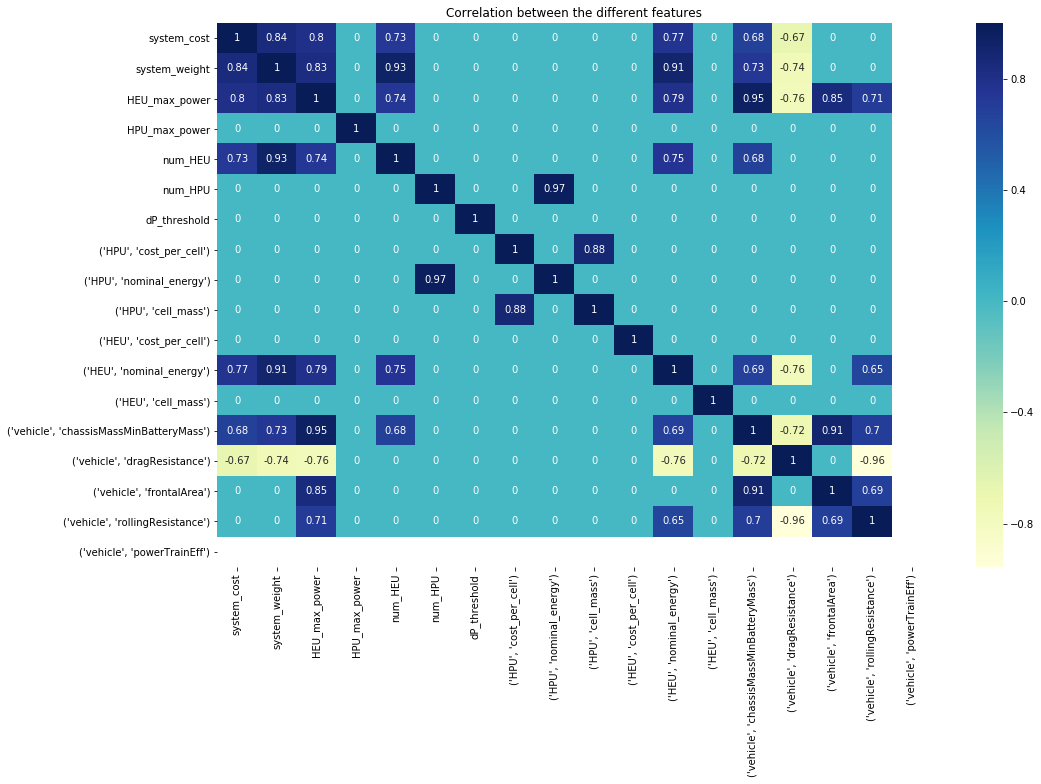

In [374]:
input_df = feature_df.T.drop(['system_range'], axis=1)
pd.options.display.float_format = '{:,.4f}'.format
df = input_df.astype('float64')
corr = df.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
plt.title('Correlation between the different features')
sns.heatmap(corr, annot=True, cmap='YlGnBu')
# plt.savefig('corr.png')
plt.savefig('corr_above65.png')
plt.show()


### Convert to array and prepare training and test data

In [290]:
feature_name_list = input_df.columns.values.tolist()
feature_name_list

['system_cost',
 'system_weight',
 'HEU_max_power',
 'HPU_max_power',
 'num_HEU',
 'num_HPU',
 'dP_threshold',
 ('HPU', 'cost_per_cell'),
 ('HPU', 'nominal_energy'),
 ('HPU', 'cell_mass'),
 ('HEU', 'cost_per_cell'),
 ('HEU', 'nominal_energy'),
 ('HEU', 'cell_mass'),
 ('vehicle', 'chassisMassMinBatteryMass'),
 ('vehicle', 'dragResistance'),
 ('vehicle', 'frontalArea'),
 ('vehicle', 'rollingResistance'),
 ('vehicle', 'powerTrainEff')]

In [286]:
X = input_df.values.astype(float)
y = feature_df.T['system_range'].values.astype(float)
print(X.shape, y.shape)

(432, 18) (432,)


## 3. Split the dataset to training and testing set

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4.1 SVM regressor

In [256]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [257]:
from sklearn.svm import SVR

clf = SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
29.797337714574045

The MSE is: 
3031.1917802911485

The r2_score is: 
0.38790682141483834


## 4.2 Random Forest regressor

In [258]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
3.562427606812576

The MSE is: 
305.23517745621524

The r2_score is: 
0.9383633951503936


## 4.3 K Neighbors Regressor

In [218]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
4.7177975324490555

The MSE is: 
336.37341064324727

The r2_score is: 
0.9320756042389436


## 4.4 Decision Tree Regressor

In [223]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
2.918647976393955

The MSE is: 
296.7287726562121

The r2_score is: 
0.9400811064434302


## 4.5 Bayesian Ridge

In [224]:
from sklearn.linear_model import BayesianRidge

clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
y_pred = clf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
11.634484234977704

The MSE is: 
315.0096338242673

The r2_score is: 
0.936389624270516


## 4.6 OLS from sklearn

In [226]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X, y)
y_pred = ols.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
10.705200871038556

The MSE is: 
247.6264987031455

The r2_score is: 
0.9499964035008817


## 4.7 OLS from statsmodels

In [333]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(y_train, X_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     196.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.02e-141
Time:                        14:46:06   Log-Likelihood:                -1261.3
No. Observations:                 289   AIC:                             2559.
Df Residuals:                     271   BIC:                             2625.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0053      0.001     -3.771      0.000      -0.008      -0.003
x2             0.4069      0.188      2.163      0.031       0.037       0.777
x3             0.1985      0.494      0.402      0.688      -0.773       1.170
x4             0.1896      0.745      0.255      0.799      -1.277       1.656
x5            -0.0089      0.008     -1.077      0.282      -0.025       0.007
x6             0.0420      0.039      1.070      0.286      -0.035       0.119
x7             1.1849      0.413      2.870      0.004       0.372       1.998
x8             0.1716      0.268      0.641      0.522      -0.356       0.699
x9             1.2561      5.480      0.229      0.819      -9.533      12.045
x10            0.0095      0.021      0.448      0.654      -0.032       0.051
x11           38.2267      6.471      5.907      0.000      25.487      50.967
x12            5.3642      0.687      7.814      0.000       4.013       6.716
x13           -0.9437      0.528     -1.786      0.075      -1.984       0.096
x14           -0.1637      0.019     -8.747      0.000      -0.201      -0.127
x15         -496.7763    480.249     -1.034      0.302   -1442.269     448.717
x16           20.0198     11.430      1.752      0.081      -2.483      42.522
x17        -6477.2902   2.07e+04     -0.312      0.755   -4.73e+04    3.44e+04
const          4.8696      5.302      0.918      0.359      -5.568      15.307
==============================================================================
Omnibus:                       87.044   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3181.873
Skew:                          -0.367   Prob(JB):                         0.00
Kurtosis:                      19.239   Cond. No.                     1.58e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check if overfitting

In [330]:
errors_train = y_train - X_train @ results.params
errors_test = y_test - X_test @ results.params
RMSE_linear_training = np.linalg.norm(errors_train / math.sqrt(len(errors_train)))
RMSE_linear_test = np.linalg.norm(errors_test / math.sqrt(len(errors_test)))
print("Training RMSE is " + str(RMSE_linear_training))
print("Test RMSE is " + str(RMSE_linear_test))

Training RMSE is 19.021761503239617
Test RMSE is 20.02882657090912


From above training and test RMSE, our model doesn't have obvious overfitting problem.

### Confidence intervals and significance
If the confidence interval for the parameter includes zero, the associated independent variable may not have any predictive value.

In [334]:
print('Confidence Intervals: \n {}'.format(results.conf_int()))
print('Parameters: {}'.format(results.params))

Confidence Intervals: 
 [[-8.01890040e-03 -2.51770272e-03]
 [ 3.65549953e-02  7.77312638e-01]
 [-7.73258897e-01  1.17028768e+00]
 [-1.27662476e+00  1.65578189e+00]
 [-2.50784483e-02  7.33979126e-03]
 [-3.52893235e-02  1.19341368e-01]
 [ 3.72134544e-01  1.99764428e+00]
 [-3.55688130e-01  6.98802562e-01]
 [-9.53252987e+00  1.20447784e+01]
 [-3.22292222e-02  5.12262025e-02]
 [ 2.54865454e+01  5.09668083e+01]
 [ 4.01257654e+00  6.71577557e+00]
 [-1.98375834e+00  9.64561798e-02]
 [-2.00569728e-01 -1.26872313e-01]
 [-1.44226927e+03  4.48716677e+02]
 [-2.48263939e+00  4.25223181e+01]
 [-4.73076024e+04  3.43530220e+04]
 [-5.56817895e+00  1.53074389e+01]]
Parameters: [-5.26830156e-03  4.06933817e-01  1.98514390e-01  1.89578569e-01
 -8.86932852e-03  4.20260225e-02  1.18488941e+00  1.71557216e-01
  1.25612428e+00  9.49849018e-03  3.82266769e+01  5.36417605e+00
 -9.43651082e-01 -1.63721020e-01 -4.96776297e+02  2.00198393e+01
 -6.47729024e+03  4.86962999e+00]


In [337]:
CIs = results.conf_int()
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
significant_name_list = []
print('Features is not Significant:')
for index, item in enumerate(notSignificant):
    if not item:
        print(f'{feature_name_list[index]} -> {item}')
        significant_name_list.append(feature_name_list[index])

Features is not Significant:
system_cost -> False
system_weight -> False
dP_threshold -> False
('HEU', 'cost_per_cell') -> False
('HEU', 'nominal_energy') -> False
('vehicle', 'chassisMassMinBatteryMass') -> False


### Remove not significant features

By eliminating independent variables that are not significant, we help avoid overfitting (since the model no longer needs to account for the noise represented by those variables).

In [318]:
Xsignif = X_train[:,~notSignificant]
Xsignif.shape

(289, 6)

In [319]:
model = sm.OLS(y_train, Xsignif)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5625.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          4.66e-291
Time:                        14:38:26   Log-Likelihood:                -1325.4
No. Observations:                 289   AIC:                             2663.
Df Residuals:                     283   BIC:                             2685.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0099      0.001     -9.795      0.0

### Show significant features versus system range

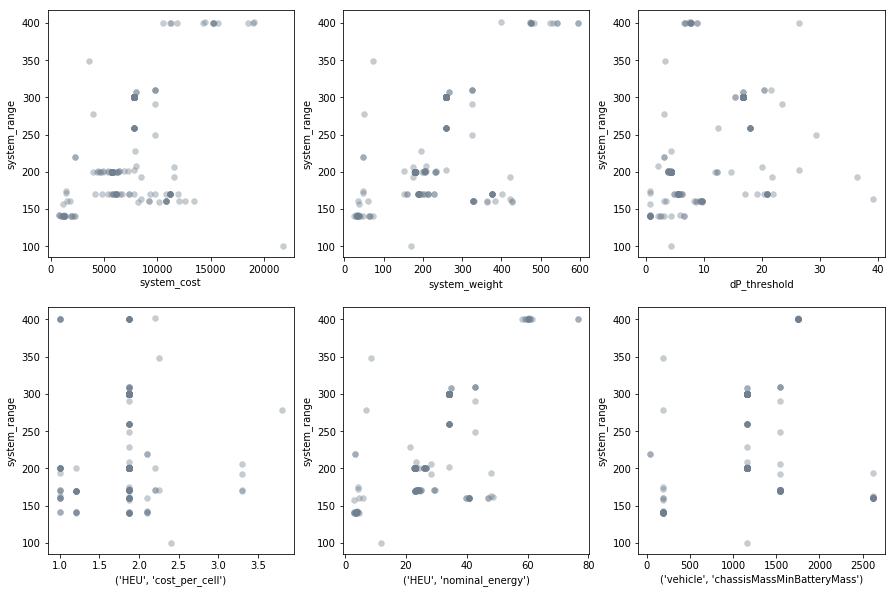

In [352]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

for i in range(6):
    plt_i = i // 3
    plt_j = i % 3
    subX_train = Xsignif[:,i]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel(significant_name_list[i])
    axes[plt_i][plt_j].set_ylabel('system_range')
plt.savefig('important_features.png')